In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics -q

import ultralytics
ultralytics.checks()

Ultralytics 8.3.76 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.2/112.6 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow -q

from roboflow import Roboflow
rf = Roboflow(api_key="QU53mBRI8tBQcNuJX6VK")
project = rf.workspace("dental-2cwjj").project("dental-oa69c")
version = project.version(1)
dataset = version.download("yolov8-obb")


import yaml

with open(f'{dataset.location}/data.yaml', 'r') as file:
    data = yaml.safe_load(file)

data['path'] = dataset.location

with open(f'{dataset.location}/data.yaml', 'w') as file:
    yaml.dump(data, file, sort_keys=False)

/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.4/80.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Dental-1 in yolov8-obb:: 100%|██████████| 1189/1189 [00:01<00:00, 943.61it/s]


In [ ]:
from ultralytics import YOLO

model = YOLO('yolo11s-obb.yaml')

results = model.train(data="DOTAv1.yaml", epochs=10, imgsz=640, batch = 8, fraction = 0.25)

Ultralytics 8.3.76 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=obb, mode=train, model=yolo11s-obb.yaml, data=DOTAv1.yaml, epochs=10, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=0.25, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line

train: Scanning /content/datasets/DOTAv1/labels/train... 353 images, 0 backgrounds, 0 corrupt: 100%|██████████| 353/353 [00:00<00:00, 601.71it/s]


train: New cache created: /content/datasets/DOTAv1/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/datasets/DOTAv1/labels/val.cache... 458 images, 2 backgrounds, 0 corrupt: 100%|██████████| 458/458 [00:00<?, ?it/s]


Plotting labels to runs/obb/train5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 87 weight(decay=0.0), 97 weight(decay=0.0005), 96 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/obb/train5
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      12.7G      4.557      5.109      4.396         21        640: 100%|██████████| 45/45 [00:23<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:18<00:00,  3.15it/s]

                   all        458      28853          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      5.46G      4.485      4.829      4.102         81        640: 100%|██████████| 45/45 [00:14<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:18<00:00,  3.08it/s]

                   all        458      28853          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      5.82G      4.259      4.492       3.95         81        640: 100%|██████████| 45/45 [00:13<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:18<00:00,  3.09it/s]

                   all        458      28853          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      5.64G      4.209      4.112      3.813        101        640: 100%|██████████| 45/45 [00:13<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:21<00:00,  2.71it/s]


                   all        458      28853      0.483    0.00816    0.00381    0.00104

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      5.47G      3.934       3.76      3.664          4        640: 100%|██████████| 45/45 [00:13<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:25<00:00,  2.28it/s]


                   all        458      28853      0.567     0.0159     0.0088    0.00244

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      5.47G      3.804       3.63      3.556          1        640: 100%|██████████| 45/45 [00:14<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  41%|████▏     | 24/58 [00:14<00:21,  1.62it/s]


OutOfMemoryError: CUDA out of memory. Tried to allocate 1.81 GiB. GPU 0 has a total capacity of 14.74 GiB of which 696.12 MiB is free. Process 37638 has 14.06 GiB memory in use. Of the allocated memory 10.11 GiB is allocated by PyTorch, and 3.75 GiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8s-obb.pt')

results = model.train(data=f"{dataset.location}/data.yaml", epochs=250, imgsz=640)

100%|██████████| 22.2M/22.2M [00:00<00:00, 26.9MB/s]


Ultralytics 8.3.2 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=obb, mode=train, model=yolov8s-obb.pt, data=/content/datasets/Dental-1/data.yaml, epochs=250, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True,

100%|██████████| 755k/755k [00:00<00:00, 26.8MB/s]


Overriding model.yaml nc=15 with nc=16

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 369MB/s]

WARNING ⚠️ yolo11n.pt appears to require 'dill', which is not in Ultralytics requirements.
AutoInstall will run now for 'dill' but this feature will be removed in the future.
Recommend fixes are to train a new model using the latest 'ultralytics' package or to run a command with an official Ultralytics model, i.e. 'yolo predict model=yolov8n.pt'
requirements: Ultralytics requirement ['dill'] not found, attempting AutoUpdate...


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 90.8 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 2.4s, installed 1 package: ['dill']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

AMP: checks passed ✅


train: Scanning /content/datasets/Dental-1/train/labels... 412 images, 3 backgrounds, 0 corrupt: 100%|██████████| 412/412 [00:00<00:00, 972.10it/s] 

train: New cache created: /content/datasets/Dental-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.17 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/datasets/Dental-1/valid/labels... 59 images, 1 backgrounds, 0 corrupt: 100%|██████████| 59/59 [00:00<00:00, 836.04it/s]

val: New cache created: /content/datasets/Dental-1/valid/labels.cache


Plotting labels to runs/obb/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.0005, momentum=0.9) with parameter groups 69 weight(decay=0.0), 79 weight(decay=0.0005), 78 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/obb/train
Starting training for 250 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/250      4.61G      2.289      4.597      2.864        509        640: 100%|██████████| 26/26 [00:25<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.12it/s]

                   all         59       1271          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/250      4.62G      1.571      4.154      2.279        454        640: 100%|██████████| 26/26 [00:17<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.82it/s]

                   all         59       1271      0.112      0.483      0.156     0.0808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/250      4.29G      1.527      3.609      2.231        610        640: 100%|██████████| 26/26 [00:10<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.33it/s]

                   all         59       1271     0.0688      0.879      0.279      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/250       4.4G      1.526      2.977      2.227        342        640: 100%|██████████| 26/26 [00:09<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.92it/s]

                   all         59       1271      0.321      0.341      0.273      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/250      4.33G      1.481      2.535      2.213        464        640: 100%|██████████| 26/26 [00:10<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.16it/s]

                   all         59       1271      0.311      0.538       0.32      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/250      4.37G      1.431      2.245      2.219        280        640: 100%|██████████| 26/26 [00:10<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.94s/it]

                   all         59       1271      0.259      0.586      0.329      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/250      4.44G      1.391      2.104      2.189        425        640: 100%|██████████| 26/26 [00:09<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.63s/it]

                   all         59       1271      0.301      0.588      0.335       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/250      4.36G      1.376      2.035      2.198        352        640: 100%|██████████| 26/26 [00:09<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.68s/it]

                   all         59       1271      0.313      0.614      0.426      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/250      4.44G       1.36      1.966       2.18        533        640: 100%|██████████| 26/26 [00:09<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.47s/it]

                   all         59       1271      0.357      0.688      0.444      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/250      4.32G      1.322      1.904      2.135        279        640: 100%|██████████| 26/26 [00:09<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.54s/it]

                   all         59       1271      0.336       0.67      0.405      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/250      4.29G      1.291      1.838      2.156        436        640: 100%|██████████| 26/26 [00:09<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.20s/it]

                   all         59       1271      0.367      0.727      0.476      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/250       4.4G      1.266      1.787      2.114        556        640: 100%|██████████| 26/26 [00:09<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.09s/it]

                   all         59       1271       0.38      0.752      0.448      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/250       4.3G      1.259      1.742      2.131        536        640: 100%|██████████| 26/26 [00:09<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.05s/it]

                   all         59       1271      0.381      0.747      0.485      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/250      4.34G      1.243      1.684      2.119        384        640: 100%|██████████| 26/26 [00:09<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.06it/s]

                   all         59       1271      0.441      0.748      0.545      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/250      4.35G      1.214      1.624      2.117        455        640: 100%|██████████| 26/26 [00:10<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.33it/s]

                   all         59       1271      0.441      0.799       0.59      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/250      4.46G      1.208      1.578      2.118        400        640: 100%|██████████| 26/26 [00:11<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.60it/s]

                   all         59       1271      0.517      0.775      0.623       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/250      4.31G      1.186      1.521      2.093        484        640: 100%|██████████| 26/26 [00:12<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]

                   all         59       1271      0.512      0.764      0.632      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/250      4.34G       1.17      1.448      2.092        592        640: 100%|██████████| 26/26 [00:12<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.61it/s]

                   all         59       1271      0.625       0.79       0.74      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/250      4.27G      1.173       1.41      2.079        533        640: 100%|██████████| 26/26 [00:12<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.82it/s]

                   all         59       1271      0.664      0.787      0.764      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/250      4.38G      1.162      1.364      2.088        486        640: 100%|██████████| 26/26 [00:11<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.56it/s]

                   all         59       1271      0.673      0.765      0.778      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/250       4.5G      1.147      1.322      2.086        431        640: 100%|██████████| 26/26 [00:09<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]

                   all         59       1271      0.697        0.8       0.77      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/250      4.47G       1.14      1.291      2.083        570        640: 100%|██████████| 26/26 [00:09<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.58it/s]

                   all         59       1271      0.751      0.773      0.814      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/250      4.27G      1.119      1.251      2.057        587        640: 100%|██████████| 26/26 [00:10<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.17it/s]

                   all         59       1271      0.776      0.814      0.837      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/250      4.29G      1.094      1.215      2.044        443        640: 100%|██████████| 26/26 [00:11<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.23it/s]

                   all         59       1271      0.781      0.823       0.84      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/250      4.28G      1.104      1.202      2.068        342        640: 100%|██████████| 26/26 [00:11<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.19it/s]

                   all         59       1271      0.799      0.823      0.853      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/250      4.32G      1.102      1.175       2.08        572        640: 100%|██████████| 26/26 [00:12<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.26it/s]

                   all         59       1271      0.818      0.826      0.861      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/250      4.39G      1.085       1.12      2.019        520        640: 100%|██████████| 26/26 [00:10<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.44it/s]

                   all         59       1271      0.802      0.848       0.86      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/250      4.36G      1.075      1.119      2.006        469        640: 100%|██████████| 26/26 [00:09<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.88it/s]

                   all         59       1271      0.799      0.846      0.868      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/250      4.29G      1.075      1.106      2.025        484        640: 100%|██████████| 26/26 [00:10<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.30it/s]

                   all         59       1271      0.804      0.847      0.864      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/250      4.34G      1.082      1.095      2.026        429        640: 100%|██████████| 26/26 [00:12<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.57it/s]

                   all         59       1271      0.831      0.857      0.875      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/250       4.3G       1.07       1.08      2.019        348        640: 100%|██████████| 26/26 [00:12<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.59it/s]

                   all         59       1271      0.823      0.847      0.876      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/250      4.35G      1.059      1.063      1.999        349        640: 100%|██████████| 26/26 [00:10<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]

                   all         59       1271      0.825      0.861      0.875      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/250      4.28G      1.045      1.017      1.979        569        640: 100%|██████████| 26/26 [00:09<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.97it/s]

                   all         59       1271      0.814      0.872      0.874      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/250       4.4G      1.049      0.996      1.997        425        640: 100%|██████████| 26/26 [00:10<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.56it/s]

                   all         59       1271      0.842      0.856      0.877      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/250      4.31G      1.053      1.014       2.02        467        640: 100%|██████████| 26/26 [00:12<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.62it/s]

                   all         59       1271      0.814      0.868       0.87      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/250      4.29G      1.036     0.9802      1.978        424        640: 100%|██████████| 26/26 [00:11<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.72it/s]

                   all         59       1271       0.82      0.848      0.869      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/250      4.37G      1.028     0.9661      1.968        565        640: 100%|██████████| 26/26 [00:10<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.88it/s]

                   all         59       1271      0.834      0.849      0.882      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/250      4.32G      1.028     0.9703       1.97        409        640: 100%|██████████| 26/26 [00:09<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.65it/s]

                   all         59       1271       0.82       0.86       0.87      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/250      4.35G       1.02     0.9729      1.975        443        640: 100%|██████████| 26/26 [00:09<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.74it/s]

                   all         59       1271      0.828      0.865      0.879      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/250      4.39G      1.018     0.9477      1.963        439        640: 100%|██████████| 26/26 [00:11<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.78it/s]

                   all         59       1271      0.835      0.867      0.879      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/250      4.39G      1.014     0.9219      1.971        363        640: 100%|██████████| 26/26 [00:12<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.80it/s]

                   all         59       1271      0.845      0.866      0.884      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/250      4.33G      1.008     0.9201       1.99        409        640: 100%|██████████| 26/26 [00:11<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.62it/s]

                   all         59       1271      0.825      0.875      0.883      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/250       4.3G      1.008     0.9116      1.964        677        640: 100%|██████████| 26/26 [00:10<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.81it/s]

                   all         59       1271      0.842      0.867      0.876      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/250      4.41G      1.006     0.9201      1.964        445        640: 100%|██████████| 26/26 [00:09<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.89it/s]

                   all         59       1271      0.843      0.861      0.878      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/250      4.35G      1.008     0.8983      1.972        459        640: 100%|██████████| 26/26 [00:11<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.17it/s]

                   all         59       1271      0.858      0.866      0.886      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/250      4.43G     0.9945     0.9032      1.978        456        640: 100%|██████████| 26/26 [00:12<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.70it/s]

                   all         59       1271      0.846      0.878      0.888      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/250      4.32G     0.9924     0.8875      1.962        387        640: 100%|██████████| 26/26 [00:12<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.81it/s]

                   all         59       1271      0.853      0.872      0.879      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/250      4.37G     0.9834     0.8673      1.946        478        640: 100%|██████████| 26/26 [00:10<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.63it/s]

                   all         59       1271      0.846      0.871      0.879      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/250      4.31G     0.9895     0.8745      1.958        418        640: 100%|██████████| 26/26 [00:09<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.05it/s]

                   all         59       1271      0.827      0.894      0.892       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/250      4.34G     0.9839     0.8666      1.958        377        640: 100%|██████████| 26/26 [00:10<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.02it/s]

                   all         59       1271      0.861      0.871      0.889      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/250      4.27G     0.9748     0.8571      1.914        484        640: 100%|██████████| 26/26 [00:12<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.08it/s]


                   all         59       1271      0.849      0.863      0.893      0.655

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/250      4.39G     0.9817     0.8623      1.932        480        640: 100%|██████████| 26/26 [00:11<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.71it/s]

                   all         59       1271      0.853      0.875       0.89      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/250      4.28G     0.9863     0.8836      1.928        526        640: 100%|██████████| 26/26 [00:11<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  2.00it/s]

                   all         59       1271      0.852      0.871       0.89      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/250      4.42G     0.9634     0.8473      1.942        364        640: 100%|██████████| 26/26 [00:09<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.69it/s]

                   all         59       1271      0.849      0.866      0.893      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/250      4.41G     0.9717     0.8448      1.918        605        640: 100%|██████████| 26/26 [00:09<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.99it/s]

                   all         59       1271      0.859      0.889      0.888      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/250       4.3G     0.9583      0.842      1.913        486        640: 100%|██████████| 26/26 [00:11<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.97it/s]


                   all         59       1271       0.84      0.888      0.884       0.66

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/250      4.34G     0.9595     0.8227        1.9        375        640: 100%|██████████| 26/26 [00:12<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.08it/s]

                   all         59       1271      0.849      0.873      0.887      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/250      4.38G     0.9689      0.842      1.924        511        640: 100%|██████████| 26/26 [00:11<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.94it/s]

                   all         59       1271      0.841      0.881      0.883      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/250      4.62G     0.9649      0.828      1.907        439        640: 100%|██████████| 26/26 [00:09<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.99it/s]

                   all         59       1271      0.866      0.874      0.884      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/250      4.44G     0.9552      0.826      1.878        402        640: 100%|██████████| 26/26 [00:14<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all         59       1271       0.86       0.88      0.891       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/250      4.38G     0.9482     0.8123      1.886        554        640: 100%|██████████| 26/26 [00:11<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.56it/s]

                   all         59       1271      0.854      0.883      0.898      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/250      4.33G     0.9448      0.801      1.898        529        640: 100%|██████████| 26/26 [00:10<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.77it/s]

                   all         59       1271      0.841      0.885      0.891      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/250      4.37G     0.9473     0.8078      1.878        294        640: 100%|██████████| 26/26 [00:12<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.39it/s]


                   all         59       1271      0.845      0.864      0.889      0.664

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/250      4.32G     0.9447     0.7946      1.879        489        640: 100%|██████████| 26/26 [00:13<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.04it/s]


                   all         59       1271      0.846      0.879      0.887      0.665

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/250      4.28G     0.9461     0.7975      1.875        502        640: 100%|██████████| 26/26 [00:12<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.11it/s]


                   all         59       1271      0.856      0.865       0.88      0.647

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/250      4.27G     0.9377     0.7801      1.869        507        640: 100%|██████████| 26/26 [00:11<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all         59       1271      0.843      0.895      0.891      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/250      4.28G      0.931     0.7931      1.872        547        640: 100%|██████████| 26/26 [00:09<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.13it/s]

                   all         59       1271      0.844      0.876      0.891       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/250      4.37G     0.9284     0.7748      1.853        525        640: 100%|██████████| 26/26 [00:10<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.05it/s]

                   all         59       1271      0.868      0.873      0.892      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/250      4.27G      0.932     0.7749      1.851        443        640: 100%|██████████| 26/26 [00:11<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.13it/s]

                   all         59       1271      0.866      0.872      0.887      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/250      4.33G     0.9316      0.777      1.853        335        640: 100%|██████████| 26/26 [00:12<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.82it/s]


                   all         59       1271      0.856      0.885      0.889      0.659

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/250       4.3G     0.9357     0.7796      1.854        589        640: 100%|██████████| 26/26 [00:11<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.53it/s]

                   all         59       1271      0.866      0.865      0.894      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/250      4.35G     0.9256     0.7631      1.853        525        640: 100%|██████████| 26/26 [00:09<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.01it/s]

                   all         59       1271      0.836      0.895      0.886      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/250       4.4G     0.9229     0.7531      1.849        377        640: 100%|██████████| 26/26 [00:09<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.01it/s]


                   all         59       1271      0.863       0.87      0.896      0.673

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/250      4.36G     0.9083     0.7503      1.836        427        640: 100%|██████████| 26/26 [00:11<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.16it/s]

                   all         59       1271      0.854      0.887      0.892      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/250      4.31G     0.9176     0.7551      1.831        534        640: 100%|██████████| 26/26 [00:12<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.13it/s]

                   all         59       1271      0.864      0.876      0.891      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/250      4.36G     0.9118     0.7581      1.841        344        640: 100%|██████████| 26/26 [00:12<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.81it/s]

                   all         59       1271      0.864      0.871      0.898      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/250      4.37G     0.9067     0.7373       1.84        381        640: 100%|██████████| 26/26 [00:09<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.63it/s]

                   all         59       1271      0.855      0.887      0.892      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/250      4.38G     0.9293     0.7655      1.839        535        640: 100%|██████████| 26/26 [00:09<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.32it/s]

                   all         59       1271      0.853       0.88      0.893      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/250      4.32G     0.9047     0.7434      1.847        617        640: 100%|██████████| 26/26 [00:12<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.30it/s]

                   all         59       1271      0.862      0.873      0.898      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/250      4.37G     0.8875      0.729      1.811        410        640: 100%|██████████| 26/26 [00:11<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.04it/s]


                   all         59       1271      0.863      0.876      0.894      0.671

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/250      4.33G     0.8907     0.7269        1.8        577        640: 100%|██████████| 26/26 [00:11<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.17it/s]

                   all         59       1271      0.855      0.888      0.901      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/250      4.39G     0.8994     0.7342      1.837        429        640: 100%|██████████| 26/26 [00:09<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.65it/s]

                   all         59       1271      0.858      0.873        0.9      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/250      4.35G      0.909     0.7576      1.819        306        640: 100%|██████████| 26/26 [00:10<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.09it/s]


                   all         59       1271      0.854      0.878      0.902      0.678

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/250      4.45G     0.8902     0.7271      1.794        473        640: 100%|██████████| 26/26 [00:11<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.32it/s]

                   all         59       1271      0.851      0.889      0.904      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/250      4.36G     0.9004     0.7193      1.803        529        640: 100%|██████████| 26/26 [00:12<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.72it/s]

                   all         59       1271      0.868      0.881      0.904      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/250      4.37G      0.895     0.7232      1.786        503        640: 100%|██████████| 26/26 [00:11<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.21it/s]

                   all         59       1271      0.853      0.867      0.899      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/250      4.36G     0.9008     0.7255      1.787        576        640: 100%|██████████| 26/26 [00:09<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all         59       1271      0.849      0.875      0.895      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/250      4.37G     0.8912     0.7122      1.765        395        640: 100%|██████████| 26/26 [00:10<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.35it/s]

                   all         59       1271      0.855      0.868      0.903      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/250      4.34G     0.8817     0.7065      1.794        610        640: 100%|██████████| 26/26 [00:11<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.96it/s]

                   all         59       1271      0.866      0.868      0.901      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/250      4.42G     0.8717     0.6953      1.787        307        640: 100%|██████████| 26/26 [00:12<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.14it/s]

                   all         59       1271      0.865       0.87      0.899      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/250      4.41G     0.8829     0.7093      1.779        632        640: 100%|██████████| 26/26 [00:10<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.60it/s]

                   all         59       1271      0.863      0.881      0.904      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/250      4.32G     0.8727      0.694      1.761        440        640: 100%|██████████| 26/26 [00:09<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.99it/s]

                   all         59       1271      0.855      0.891      0.897      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/250      4.35G     0.8709     0.6905      1.776        429        640: 100%|██████████| 26/26 [00:10<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.04it/s]

                   all         59       1271      0.861      0.881      0.897      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/250      4.37G     0.8747      0.689       1.76        473        640: 100%|██████████| 26/26 [00:12<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.01it/s]


                   all         59       1271      0.849      0.883      0.897      0.673

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/250       4.4G      0.875     0.7091      1.774        407        640: 100%|██████████| 26/26 [00:12<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.86it/s]


                   all         59       1271       0.88      0.852      0.901      0.668

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/250      4.32G     0.8724     0.6955      1.761        390        640: 100%|██████████| 26/26 [00:10<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]

                   all         59       1271      0.865       0.88      0.893      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/250       4.4G     0.8597     0.6963      1.774        448        640: 100%|██████████| 26/26 [00:09<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.96it/s]

                   all         59       1271       0.87      0.886      0.896      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/250      4.37G     0.8641     0.6997       1.76        557        640: 100%|██████████| 26/26 [00:10<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.06it/s]

                   all         59       1271      0.866      0.877      0.893      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/250      4.35G      0.872     0.6937       1.75        387        640: 100%|██████████| 26/26 [00:11<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.23it/s]


                   all         59       1271      0.862      0.876      0.898      0.676

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/250      4.44G     0.8727     0.6922      1.747        334        640: 100%|██████████| 26/26 [00:11<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.11it/s]

                   all         59       1271      0.846      0.872      0.889      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/250      4.27G     0.8643     0.6875      1.761        508        640: 100%|██████████| 26/26 [00:13<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.00it/s]

                   all         59       1271      0.853      0.879      0.895       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/250      4.29G     0.8607     0.6845      1.734        376        640: 100%|██████████| 26/26 [00:10<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.64it/s]

                   all         59       1271      0.873      0.871      0.905      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/250      4.39G     0.8597     0.6787      1.751        330        640: 100%|██████████| 26/26 [00:09<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.20it/s]

                   all         59       1271      0.856      0.886      0.903      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/250      4.42G       0.85     0.6768      1.746        455        640: 100%|██████████| 26/26 [00:11<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.08it/s]

                   all         59       1271      0.862      0.885      0.901      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/250      4.43G     0.8593     0.6845      1.752        408        640: 100%|██████████| 26/26 [00:12<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.87it/s]

                   all         59       1271      0.856      0.871      0.895      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/250      4.42G     0.8597     0.6854      1.738        501        640: 100%|██████████| 26/26 [00:11<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.79it/s]

                   all         59       1271      0.845      0.892      0.901      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/250      4.39G     0.8348     0.6597      1.738        438        640: 100%|██████████| 26/26 [00:09<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all         59       1271      0.871      0.886      0.909      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/250      4.35G     0.8506     0.6605      1.742        418        640: 100%|██████████| 26/26 [00:10<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.58it/s]

                   all         59       1271      0.851      0.884      0.898      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/250      4.42G     0.8609     0.6764      1.754        547        640: 100%|██████████| 26/26 [00:11<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.19it/s]

                   all         59       1271       0.86      0.877      0.899      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/250      4.38G     0.8514     0.6609      1.729        490        640: 100%|██████████| 26/26 [00:11<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.05it/s]

                   all         59       1271      0.858      0.883      0.901      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/250      4.37G     0.8518     0.6754      1.731        343        640: 100%|██████████| 26/26 [00:11<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.39it/s]


                   all         59       1271      0.845      0.893      0.901      0.682

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/250      4.35G     0.8398     0.6528      1.705        528        640: 100%|██████████| 26/26 [00:09<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.13it/s]

                   all         59       1271      0.861      0.881      0.901       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/250      4.37G     0.8455      0.659      1.708        531        640: 100%|██████████| 26/26 [00:10<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.11it/s]

                   all         59       1271      0.857      0.894      0.903      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/250      4.29G      0.833     0.6419      1.694        460        640: 100%|██████████| 26/26 [00:11<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.42it/s]

                   all         59       1271      0.866      0.883      0.894      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/250      4.34G     0.8395     0.6488       1.71        396        640: 100%|██████████| 26/26 [00:12<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.15it/s]

                   all         59       1271       0.86      0.888      0.899      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/250      4.47G     0.8375     0.6562      1.711        390        640: 100%|██████████| 26/26 [00:11<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.86it/s]

                   all         59       1271      0.856        0.9      0.906      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/250      4.31G     0.8485     0.6586       1.72        363        640: 100%|██████████| 26/26 [00:10<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.66it/s]

                   all         59       1271      0.859      0.894      0.901      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/250      4.39G      0.845       0.66      1.702        548        640: 100%|██████████| 26/26 [00:09<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.77it/s]

                   all         59       1271      0.858      0.879      0.904      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/250      4.32G     0.8274     0.6424        1.7        393        640: 100%|██████████| 26/26 [00:11<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.18it/s]

                   all         59       1271      0.856      0.886      0.902      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/250      4.41G     0.8262     0.6388      1.682        556        640: 100%|██████████| 26/26 [00:11<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.09it/s]

                   all         59       1271      0.864      0.873      0.904      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/250      4.35G     0.8334     0.6374      1.691        357        640: 100%|██████████| 26/26 [00:12<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.65it/s]

                   all         59       1271      0.871      0.881      0.911      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/250      4.44G     0.8403     0.6449      1.699        394        640: 100%|██████████| 26/26 [00:09<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.67it/s]

                   all         59       1271       0.88      0.882      0.899      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/250      4.34G     0.8201     0.6388      1.699        435        640: 100%|██████████| 26/26 [00:09<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.90it/s]

                   all         59       1271      0.872      0.883      0.905      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/250      4.32G     0.8172     0.6289       1.67        450        640: 100%|██████████| 26/26 [00:11<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.69it/s]

                   all         59       1271      0.868      0.874      0.904      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/250      4.36G     0.8203     0.6368      1.679        455        640: 100%|██████████| 26/26 [00:12<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.96it/s]

                   all         59       1271      0.848      0.881      0.897      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/250      4.31G     0.8171     0.6294      1.664        366        640: 100%|██████████| 26/26 [00:12<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.07it/s]


                   all         59       1271      0.862      0.896      0.903      0.684

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/250      4.49G     0.8122     0.6288      1.671        565        640: 100%|██████████| 26/26 [00:10<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.69it/s]

                   all         59       1271      0.873      0.884      0.904      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/250      4.34G     0.8155     0.6351      1.689        422        640: 100%|██████████| 26/26 [00:09<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.24it/s]

                   all         59       1271      0.867      0.885      0.897       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/250      4.33G     0.8144      0.621      1.666        630        640: 100%|██████████| 26/26 [00:11<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.40it/s]

                   all         59       1271      0.873       0.88      0.896      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/250       4.4G     0.8113     0.6309      1.663        376        640: 100%|██████████| 26/26 [00:12<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.03it/s]

                   all         59       1271      0.864      0.881      0.896      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/250      4.41G     0.8126      0.618      1.646        431        640: 100%|██████████| 26/26 [00:11<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

                   all         59       1271      0.869      0.884      0.901      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/250      4.32G     0.8109     0.6221      1.667        508        640: 100%|██████████| 26/26 [00:09<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.91it/s]

                   all         59       1271      0.875      0.875      0.909      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/250      4.38G     0.8112     0.6195      1.671        436        640: 100%|██████████| 26/26 [00:10<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.58it/s]

                   all         59       1271      0.857       0.89      0.906      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/250      4.41G      0.808     0.6162      1.655        490        640: 100%|██████████| 26/26 [00:11<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.41it/s]

                   all         59       1271      0.861      0.888      0.901      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/250       4.3G     0.8064      0.611      1.628        404        640: 100%|██████████| 26/26 [00:11<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.26it/s]

                   all         59       1271      0.854      0.886      0.895       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/250       4.3G     0.8057     0.6166      1.622        374        640: 100%|██████████| 26/26 [00:11<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.76it/s]

                   all         59       1271      0.845      0.893      0.897      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/250      4.34G     0.8029     0.6087      1.644        536        640: 100%|██████████| 26/26 [00:09<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.87it/s]

                   all         59       1271      0.861      0.886      0.895       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/250      4.41G     0.7928     0.6031      1.642        318        640: 100%|██████████| 26/26 [00:10<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.64it/s]

                   all         59       1271      0.865      0.889        0.9      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/250      4.37G      0.797     0.6071      1.647        574        640: 100%|██████████| 26/26 [00:12<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.50it/s]

                   all         59       1271      0.859      0.889      0.897      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/250      4.37G     0.7947     0.6035      1.615        566        640: 100%|██████████| 26/26 [00:12<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.30it/s]

                   all         59       1271      0.866      0.875      0.901      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/250      4.33G     0.7905     0.5987      1.618        399        640: 100%|██████████| 26/26 [00:11<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.46it/s]

                   all         59       1271      0.881      0.873      0.903      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/250      4.31G     0.7951     0.6023      1.616        498        640: 100%|██████████| 26/26 [00:09<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.11it/s]

                   all         59       1271      0.866      0.879      0.901      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/250      4.31G     0.7936     0.6011      1.617        517        640: 100%|██████████| 26/26 [00:11<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.09it/s]

                   all         59       1271      0.861      0.874      0.902      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/250      4.35G     0.8203      0.626      1.641        366        640: 100%|██████████| 26/26 [00:12<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.32it/s]


                   all         59       1271      0.869      0.876      0.903      0.685

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/250      4.35G     0.7895     0.5989      1.619        396        640: 100%|██████████| 26/26 [00:12<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.07it/s]

                   all         59       1271      0.865      0.881      0.898      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/250      4.37G     0.7889     0.6031      1.612        606        640: 100%|██████████| 26/26 [00:12<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.12it/s]

                   all         59       1271      0.878      0.866      0.905      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/250      4.34G     0.7986      0.609      1.619        575        640: 100%|██████████| 26/26 [00:11<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.07it/s]

                   all         59       1271      0.861      0.877      0.896      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/250      4.37G     0.7958     0.6063      1.618        410        640: 100%|██████████| 26/26 [00:09<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.12it/s]

                   all         59       1271      0.862      0.883        0.9      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/250      4.51G     0.7895      0.598      1.618        535        640: 100%|██████████| 26/26 [00:10<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.01it/s]

                   all         59       1271      0.867      0.875      0.902      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/250      4.28G     0.7852     0.5998      1.626        591        640: 100%|██████████| 26/26 [00:12<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.93it/s]

                   all         59       1271      0.886       0.87      0.911      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/250      4.38G     0.7921     0.5955      1.622        302        640: 100%|██████████| 26/26 [00:12<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.21it/s]

                   all         59       1271      0.858      0.882      0.899      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/250      4.36G     0.7985     0.6036      1.621        399        640: 100%|██████████| 26/26 [00:11<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.19it/s]

                   all         59       1271      0.854      0.889      0.903      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/250      4.34G     0.7815     0.5862      1.596        490        640: 100%|██████████| 26/26 [00:09<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.04it/s]

                   all         59       1271      0.868      0.886      0.899      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/250      4.41G     0.7768     0.5852        1.6        437        640: 100%|██████████| 26/26 [00:11<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.46it/s]

                   all         59       1271      0.861      0.874      0.898      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/250      4.37G     0.7842     0.5839      1.601        463        640: 100%|██████████| 26/26 [00:12<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.13it/s]

                   all         59       1271      0.854      0.888      0.905      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/250      4.35G     0.7719     0.5746      1.614        519        640: 100%|██████████| 26/26 [00:12<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.14it/s]

                   all         59       1271      0.865      0.881      0.899      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/250      4.36G     0.7805      0.587      1.604        577        640: 100%|██████████| 26/26 [00:10<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.65it/s]

                   all         59       1271      0.859      0.885      0.903      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/250      4.43G     0.7793     0.5823      1.595        346        640: 100%|██████████| 26/26 [00:09<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.89it/s]

                   all         59       1271      0.862      0.883      0.904       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/250      4.45G     0.7818     0.5899      1.583        548        640: 100%|██████████| 26/26 [00:11<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.99it/s]

                   all         59       1271       0.88      0.874      0.902      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/250      4.28G     0.7686     0.5786      1.598        373        640: 100%|██████████| 26/26 [00:12<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.22it/s]

                   all         59       1271      0.864      0.878      0.892      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/250      4.34G     0.7658     0.5715      1.578        379        640: 100%|██████████| 26/26 [00:12<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.24it/s]


                   all         59       1271      0.873      0.878      0.896       0.68

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/250      4.36G      0.767     0.5732      1.592        409        640: 100%|██████████| 26/26 [00:10<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.60it/s]

                   all         59       1271       0.87      0.872      0.901      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/250      4.32G     0.7658     0.5707      1.592        380        640: 100%|██████████| 26/26 [00:09<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.54it/s]

                   all         59       1271      0.847      0.889      0.899      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/250      4.41G      0.764     0.5756      1.605        640        640: 100%|██████████| 26/26 [00:11<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.22it/s]

                   all         59       1271      0.879      0.861      0.908       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/250       4.3G     0.7723     0.5752      1.602        560        640: 100%|██████████| 26/26 [00:12<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.85it/s]

                   all         59       1271      0.862       0.89      0.903      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/250       4.4G     0.7713     0.5731      1.583        424        640: 100%|██████████| 26/26 [00:12<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.71it/s]

                   all         59       1271       0.86      0.894      0.903      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/250      4.35G     0.7586      0.562      1.558        498        640: 100%|██████████| 26/26 [00:10<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.85it/s]

                   all         59       1271      0.869      0.889      0.906      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/250      4.37G     0.7643     0.5781      1.553        342        640: 100%|██████████| 26/26 [00:09<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.91it/s]

                   all         59       1271      0.873      0.875      0.904      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/250      4.43G     0.7752     0.5836      1.585        363        640: 100%|██████████| 26/26 [00:11<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.20it/s]

                   all         59       1271      0.869      0.871      0.901      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/250      4.29G     0.7634     0.5639      1.582        423        640: 100%|██████████| 26/26 [00:12<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.14it/s]

                   all         59       1271      0.876      0.881      0.904      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/250      4.35G     0.7686     0.5721      1.589        459        640: 100%|██████████| 26/26 [00:12<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.92it/s]

                   all         59       1271       0.88      0.873      0.897      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/250      4.37G     0.7612     0.5672      1.572        371        640: 100%|██████████| 26/26 [00:10<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all         59       1271      0.868      0.877        0.9      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/250      4.42G     0.7644      0.565       1.55        394        640: 100%|██████████| 26/26 [00:09<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.46it/s]

                   all         59       1271      0.859      0.888      0.904      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/250      4.34G     0.7512     0.5557      1.574        431        640: 100%|██████████| 26/26 [00:11<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.67it/s]

                   all         59       1271      0.851      0.892        0.9      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/250      4.27G     0.7561     0.5674      1.575        598        640: 100%|██████████| 26/26 [00:12<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.20it/s]

                   all         59       1271      0.858      0.888      0.898      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/250      4.27G     0.7538     0.5616      1.562        363        640: 100%|██████████| 26/26 [00:11<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.95it/s]

                   all         59       1271      0.864      0.881      0.899      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/250      4.32G      0.751     0.5644      1.556        547        640: 100%|██████████| 26/26 [00:10<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.13it/s]

                   all         59       1271      0.862      0.879      0.901      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/250      4.32G     0.7626     0.5714      1.567        422        640: 100%|██████████| 26/26 [00:09<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.86it/s]

                   all         59       1271      0.863      0.885      0.902      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/250      4.35G     0.7501     0.5616      1.565        423        640: 100%|██████████| 26/26 [00:11<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.60it/s]

                   all         59       1271      0.878      0.862      0.908      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/250      4.39G     0.7418     0.5532      1.548        428        640: 100%|██████████| 26/26 [00:12<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.67it/s]

                   all         59       1271      0.871      0.883      0.907      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/250      4.53G      0.746     0.5568      1.551        673        640: 100%|██████████| 26/26 [00:11<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.82it/s]

                   all         59       1271      0.868      0.887        0.9      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/250      4.41G     0.7421     0.5445      1.541        388        640: 100%|██████████| 26/26 [00:10<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.91it/s]

                   all         59       1271      0.869      0.889      0.901      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/250      4.31G     0.7575     0.5693      1.551        327        640: 100%|██████████| 26/26 [00:09<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.69it/s]

                   all         59       1271      0.883      0.873      0.901      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/250      4.41G     0.7468     0.5521      1.552        495        640: 100%|██████████| 26/26 [00:11<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.50it/s]

                   all         59       1271      0.875      0.877        0.9      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/250      4.32G     0.7439     0.5514      1.543        538        640: 100%|██████████| 26/26 [00:12<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.59it/s]

                   all         59       1271      0.879      0.875      0.901      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/250       4.3G     0.7528     0.5594      1.554        526        640: 100%|██████████| 26/26 [00:11<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.51it/s]

                   all         59       1271      0.882      0.869      0.907      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/250      4.34G     0.7304     0.5457      1.543        387        640: 100%|██████████| 26/26 [00:09<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.98it/s]

                   all         59       1271      0.879      0.877      0.906      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/250      4.44G     0.7303     0.5411      1.534        489        640: 100%|██████████| 26/26 [00:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.33it/s]

                   all         59       1271      0.875      0.876      0.907      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/250      4.32G     0.7372     0.5472      1.541        551        640: 100%|██████████| 26/26 [00:11<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.35it/s]

                   all         59       1271      0.883      0.868      0.901      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/250      4.36G     0.7431       0.55      1.534        445        640: 100%|██████████| 26/26 [00:12<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.45it/s]

                   all         59       1271      0.879      0.873      0.907      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/250       4.4G      0.751     0.5502      1.532        394        640: 100%|██████████| 26/26 [00:10<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.62it/s]

                   all         59       1271      0.881      0.868      0.908      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/250      4.31G     0.7484     0.5508      1.542        377        640: 100%|██████████| 26/26 [00:09<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.22it/s]

                   all         59       1271      0.872      0.877      0.905      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/250      4.36G     0.7325     0.5405       1.52        425        640: 100%|██████████| 26/26 [00:10<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.44it/s]

                   all         59       1271      0.864      0.877      0.903       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/250      4.41G      0.741     0.5537      1.543        524        640: 100%|██████████| 26/26 [00:12<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.36it/s]

                   all         59       1271      0.882      0.872      0.906      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/250      4.43G     0.7374     0.5483      1.546        459        640: 100%|██████████| 26/26 [00:12<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.02it/s]

                   all         59       1271      0.881      0.875      0.907      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/250      4.33G     0.7412     0.5451      1.539        495        640: 100%|██████████| 26/26 [00:10<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all         59       1271       0.88      0.884      0.904      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/250      4.41G     0.7365     0.5424      1.531        467        640: 100%|██████████| 26/26 [00:09<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.81it/s]

                   all         59       1271      0.887      0.873      0.901      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/250      4.36G     0.7255     0.5355      1.532        403        640: 100%|██████████| 26/26 [00:11<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.37it/s]

                   all         59       1271      0.886      0.878      0.903      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/250      4.31G     0.7323     0.5396      1.525        422        640: 100%|██████████| 26/26 [00:12<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.60it/s]

                   all         59       1271      0.883      0.876      0.905      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/250      4.41G     0.7219     0.5352      1.526        413        640: 100%|██████████| 26/26 [00:11<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.14it/s]

                   all         59       1271       0.89      0.875      0.906      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/250      4.31G     0.7446     0.5493      1.539        349        640: 100%|██████████| 26/26 [00:09<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.15it/s]

                   all         59       1271      0.872      0.884      0.902      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/250      4.33G     0.7473     0.5532       1.53        376        640: 100%|██████████| 26/26 [00:10<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.64it/s]

                   all         59       1271      0.875      0.889      0.904      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/250      4.29G     0.7393     0.5506      1.532        577        640: 100%|██████████| 26/26 [00:11<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.18it/s]

                   all         59       1271      0.881      0.876      0.902       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/250      4.37G      0.729     0.5348      1.535        422        640: 100%|██████████| 26/26 [00:12<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.27it/s]

                   all         59       1271      0.876      0.881      0.904      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/250      4.46G     0.7351     0.5404       1.54        327        640: 100%|██████████| 26/26 [00:11<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.77it/s]

                   all         59       1271      0.886      0.867      0.905      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/250      4.41G     0.7313     0.5353      1.521        426        640: 100%|██████████| 26/26 [00:09<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.05it/s]

                   all         59       1271      0.878      0.871      0.907      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/250      4.35G     0.7178      0.527      1.512        565        640: 100%|██████████| 26/26 [00:10<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.61it/s]

                   all         59       1271      0.875      0.876      0.904      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/250      4.38G     0.7201     0.5306      1.511        576        640: 100%|██████████| 26/26 [00:11<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.24it/s]

                   all         59       1271      0.871      0.882      0.903      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/250      4.29G     0.7115     0.5222      1.503        489        640: 100%|██████████| 26/26 [00:12<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.02it/s]

                   all         59       1271      0.865      0.888      0.901       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/250      4.33G     0.7235     0.5321      1.502        612        640: 100%|██████████| 26/26 [00:10<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.77it/s]

                   all         59       1271      0.862      0.889      0.899      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/250      4.28G     0.7062     0.5224      1.505        457        640: 100%|██████████| 26/26 [00:09<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.28it/s]

                   all         59       1271       0.87      0.875      0.908      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/250      4.35G      0.727      0.534      1.509        645        640: 100%|██████████| 26/26 [00:10<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.89it/s]

                   all         59       1271      0.881      0.868      0.903      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/250      4.37G     0.7184     0.5303      1.506        439        640: 100%|██████████| 26/26 [00:12<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.42it/s]

                   all         59       1271      0.877      0.874      0.903      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/250      4.37G      0.729     0.5401      1.526        408        640: 100%|██████████| 26/26 [00:12<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.60it/s]

                   all         59       1271       0.87      0.876      0.907      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/250      4.29G     0.7191     0.5374      1.508        501        640: 100%|██████████| 26/26 [00:11<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.04it/s]

                   all         59       1271      0.884      0.871      0.904      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/250      4.34G     0.7199     0.5314      1.514        634        640: 100%|██████████| 26/26 [00:09<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.18it/s]

                   all         59       1271      0.888      0.871      0.907      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/250      4.35G     0.7276     0.5326      1.507        364        640: 100%|██████████| 26/26 [00:10<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.00it/s]

                   all         59       1271      0.886      0.876      0.907      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/250      4.31G     0.7126      0.531      1.511        273        640: 100%|██████████| 26/26 [00:12<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.03it/s]

                   all         59       1271      0.879      0.881      0.902      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/250      4.29G     0.7243     0.5299      1.513        495        640: 100%|██████████| 26/26 [00:11<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.01it/s]

                   all         59       1271      0.873      0.879      0.901      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/250      4.34G      0.711     0.5251      1.496        425        640: 100%|██████████| 26/26 [00:11<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all         59       1271      0.869      0.882      0.905      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/250      4.37G     0.7091     0.5216      1.494        508        640: 100%|██████████| 26/26 [00:09<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.98it/s]

                   all         59       1271      0.878      0.878      0.905      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/250      4.48G     0.7082      0.523      1.492        455        640: 100%|██████████| 26/26 [00:10<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.07it/s]

                   all         59       1271      0.876      0.879      0.906      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/250      4.34G     0.7161     0.5278      1.503        534        640: 100%|██████████| 26/26 [00:12<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.04it/s]


                   all         59       1271      0.878      0.885      0.906      0.699

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/250      4.32G     0.7246     0.5274      1.505        491        640: 100%|██████████| 26/26 [00:11<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.40it/s]

                   all         59       1271      0.887       0.87      0.903      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/250      4.34G     0.7124      0.521      1.506        422        640: 100%|██████████| 26/26 [00:11<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]

                   all         59       1271      0.882      0.876      0.904      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/250      4.32G      0.714     0.5255      1.509        489        640: 100%|██████████| 26/26 [00:09<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.96it/s]

                   all         59       1271      0.881      0.876      0.904      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/250      4.49G     0.7089     0.5189      1.488        487        640: 100%|██████████| 26/26 [00:10<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.26it/s]

                   all         59       1271      0.884      0.872      0.906      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/250      4.39G     0.7017     0.5181      1.496        557        640: 100%|██████████| 26/26 [00:12<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.07it/s]

                   all         59       1271      0.887      0.863      0.907      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/250      4.44G     0.7219     0.5325      1.521        364        640: 100%|██████████| 26/26 [00:12<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.60it/s]

                   all         59       1271       0.87      0.881      0.906      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/250      4.32G     0.7054     0.5213      1.502        537        640: 100%|██████████| 26/26 [00:10<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.81it/s]

                   all         59       1271      0.873      0.886      0.907      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/250      4.31G     0.7162     0.5257       1.51        307        640: 100%|██████████| 26/26 [00:09<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.02it/s]

                   all         59       1271      0.876      0.878      0.905      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/250       4.3G     0.7137     0.5246       1.51        465        640: 100%|██████████| 26/26 [00:11<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.69it/s]

                   all         59       1271      0.877      0.878      0.904      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/250      4.35G     0.7082     0.5164      1.493        484        640: 100%|██████████| 26/26 [00:12<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.31it/s]

                   all         59       1271      0.879       0.88      0.905      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/250      4.46G     0.7043     0.5122      1.486        549        640: 100%|██████████| 26/26 [00:11<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.18it/s]

                   all         59       1271       0.87      0.878      0.904      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/250      4.31G     0.7091     0.5252      1.513        570        640: 100%|██████████| 26/26 [00:10<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.62it/s]

                   all         59       1271      0.876      0.881      0.906      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/250      4.42G     0.7249     0.5277       1.51        560        640: 100%|██████████| 26/26 [00:09<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.63it/s]

                   all         59       1271       0.88      0.882      0.905      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/250      4.28G     0.7128     0.5219      1.496        296        640: 100%|██████████| 26/26 [00:11<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.23it/s]

                   all         59       1271       0.88      0.882      0.905      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/250      4.38G     0.6994     0.5144      1.486        446        640: 100%|██████████| 26/26 [00:12<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.25it/s]

                   all         59       1271      0.881       0.88      0.907      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/250      4.39G     0.7069     0.5117      1.482        447        640: 100%|██████████| 26/26 [00:11<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.05it/s]

                   all         59       1271      0.881       0.88      0.907      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/250      4.43G     0.7089     0.5181      1.483        430        640: 100%|██████████| 26/26 [00:10<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.98it/s]

                   all         59       1271      0.869       0.89      0.906      0.698


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/250      4.21G     0.6519      0.496       1.51        337        640: 100%|██████████| 26/26 [00:18<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.83it/s]

                   all         59       1271      0.867      0.894      0.902      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/250      4.47G     0.6609     0.4993      1.525        293        640: 100%|██████████| 26/26 [00:13<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.29it/s]

                   all         59       1271      0.874      0.884        0.9       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/250      4.21G     0.6363     0.4748      1.485        302        640: 100%|██████████| 26/26 [00:08<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.95it/s]

                   all         59       1271      0.867      0.893      0.901      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/250      4.23G     0.6337     0.4742      1.484        253        640: 100%|██████████| 26/26 [00:08<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.83it/s]

                   all         59       1271      0.886      0.878        0.9      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/250      4.21G     0.6307     0.4721       1.47        301        640: 100%|██████████| 26/26 [00:10<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]

                   all         59       1271      0.878      0.881      0.899      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/250      4.23G     0.6227     0.4627      1.482        316        640: 100%|██████████| 26/26 [00:08<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.58it/s]

                   all         59       1271      0.879       0.88        0.9       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/250      4.21G     0.6291     0.4705      1.475        286        640: 100%|██████████| 26/26 [00:09<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.81it/s]

                   all         59       1271      0.879      0.883        0.9       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/250      4.29G     0.6224     0.4619      1.459        278        640: 100%|██████████| 26/26 [00:10<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.76it/s]


                   all         59       1271      0.878      0.881        0.9      0.689

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/250      4.21G     0.6311     0.4699      1.481        258        640: 100%|██████████| 26/26 [00:08<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.80it/s]

                   all         59       1271      0.879      0.879      0.901      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/250      4.29G     0.6231     0.4663      1.478        283        640: 100%|██████████| 26/26 [00:09<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.77it/s]

                   all         59       1271       0.88      0.881      0.901       0.69



250 epochs completed in 0.971 hours.
Optimizer stripped from runs/obb/train/weights/last.pt, 20.8MB
Optimizer stripped from runs/obb/train/weights/best.pt, 20.8MB

Validating runs/obb/train/weights/best.pt...
Ultralytics 8.3.2 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-obb summary (fused): 205 layers, 10,119,843 parameters, 0 gradients, 24.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.26it/s]


                   all         59       1271      0.881       0.88      0.907      0.699
                   LCD         50         53      0.785      0.774      0.793       0.63
                   LCU         41         42      0.922       0.85      0.907      0.706
                   LID         53        104      0.857      0.867      0.905      0.665
                   LIU         49         91      0.876      0.912      0.939       0.73
                   LMD         42         82      0.962      0.933      0.965      0.835
                   LMU         51        116      0.977      0.905      0.949      0.749
                  LPMD         45         82      0.854      0.854       0.87      0.684
                  LPMU         42         69      0.868      0.826      0.902      0.646
                   RCD         49         49      0.703      0.735      0.745       0.55
                   RCU         40         40      0.855      0.925      0.912       0.68
                   RI

In [ ]:
from ultralytics import YOLO

In [ ]:
metrics = model.val(data=f"{dataset.location}/data.yaml")
print(metrics.box.map)

Ultralytics 8.3.2 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/datasets/Dental-1/test/labels... 118 images, 0 backgrounds, 0 corrupt: 100%|██████████| 118/118 [00:00<00:00, 592.67it/s]

val: New cache created: /content/datasets/Dental-1/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:09<00:00,  1.22s/it]


                   all        118       2937       0.91      0.906       0.93      0.713
                   LCD        109        110      0.843      0.864      0.879      0.701
                   LCU         98        102      0.873      0.853      0.877       0.69
                   LID        114        222      0.923      0.923      0.949      0.686
                   LIU        105        198      0.946      0.939      0.959      0.774
                   LMD         95        223      0.968      0.958      0.976      0.825
                   LMU        107        251      0.952      0.884       0.96       0.74
                  LPMD        106        189      0.926      0.926      0.947      0.715
                  LPMU         91        156      0.839      0.901      0.874      0.623
                   RCD        112        113      0.838      0.876      0.855      0.625
                   RCU         99        101      0.882       0.89      0.908      0.673
                   RI

In [ ]:
model = YOLO('/content/best.pt')

import os
import random

#random_file = random.choice(os.listdir(f"{dataset.location}/test/images"))
#file_name = os.path.join(f"{dataset.location}/test/images", random_file)
file_name = '/content/datasets/Dental-1/test/images/135_jpg.rf.f7331490d6b6f5f52904889bd0de6164.jpg'
results = model(file_name)

print(results[0])


image 1/1 /content/datasets/Dental-1/test/images/135_jpg.rf.f7331490d6b6f5f52904889bd0de6164.jpg: 640x640 16.7ms
Speed: 2.0ms preprocess, 16.7ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)
ultralytics.engine.results.Results object with attributes:

boxes: None
keypoints: None
masks: None
names: {0: 'LCD', 1: 'LCU', 2: 'LID', 3: 'LIU', 4: 'LMD', 5: 'LMU', 6: 'LPMD', 7: 'LPMU', 8: 'RCD', 9: 'RCU', 10: 'RID', 11: 'RIU', 12: 'RMD', 13: 'RMU', 14: 'RPMD', 15: 'RPMU'}
obb: ultralytics.engine.results.OBB object
orig_img: array([[[ 83,  83,  83],
        [ 89,  89,  89],
        [ 92,  92,  92],
        ...,
        [ 93,  93,  93],
        [ 91,  91,  91],
        [ 89,  89,  89]],

       [[237, 237, 237],
        [250, 250, 250],
        [255, 255, 255],
        ...,
        [244, 244, 244],
        [244, 244, 244],
        [244, 244, 244]],

       [[251, 251, 251],
        [250, 250, 250],
        [249, 249, 249],
        ...,
        [249, 249, 249],
        [251, 2

In [ ]:
>>> results = model("image.jpg")
>>> obb = results[0].obb
>>> xywhr = obb.xywhr
>>> print(xywhr.shape)
torch.Size([3, 5])

# Single cell Run

In [ ]:
# Repeat for another
# !pip install ultralytics -q             # OBB

import ultralytics
from ultralytics import YOLO
import pandas as pd

ultralytics.checks()

model = YOLO("/content/gdrive/MyDrive/Research/FAQ - Dental/Dental RC papers/Weights/YOLO-obb/best.pt")
source = "/content/gdrive/MyDrive/Research/FAQ - Dental/Dental RC papers/image/177_jpg.rf.ee47ab5dfd00c7f734bd5569bde3436d.jpg"

results = model.predict(source=source, conf=0.25)

col_names = ["C_ID", "C_Name", "Conf.", "Theta", "cx_Box"]
up_tooth = []
dn_tooth = []

for result in results:
    for i, xywhr in enumerate(result.obb.xywhr):    # for all bboxes
        x, y, w, h, r = xywhr
        class_id = int(result.obb.cls[i])
        class_name = result.names[class_id]
        class_conf = float(result.obb.conf[i])
        r = float(r)
        x = float(x)
        new_data = [class_id, class_name, class_conf, r, x]
        if class_name[-1] == "U":
            up_tooth.append(new_data)
        else:
            dn_tooth.append(new_data)

up_tooth_df = pd.DataFrame(up_tooth, columns = col_names)
up_tooth_df.sort_values(["cx_Box"], ascending=[True], inplace=True)
print(f"up_tooth_df:\n{up_tooth_df}")

dn_tooth_df = pd.DataFrame(dn_tooth, columns = col_names)
dn_tooth_df.sort_values(["cx_Box"], ascending=[True], inplace=True)
print(f"dn_tooth_df:\n{dn_tooth_df}")

# Match one to one

In [ ]:
import os
# org_img = "/content/gdrive/MyDrive/Research/FAQ - Dental/Dental RC papers/Feature test/387_jpg.rf.bbba86d6c7f9c9dd610eceb05e123bd3.jpg"
org_img = "/content/gdrive/MyDrive/Research/FAQ - Dental/Dental RC papers/Feature test/342_jpg.rf.c84524b472fd68c1c02b246d4150f1e0.jpg"

# edt_img = "/content/gdrive/MyDrive/Research/FAQ - Dental/Dental RC papers/Findings/feature test_edited/387_jpg.rf.bbba86d6c7f9c9dd610eceb05e123bd3.jpg"
edt_img = "/content/gdrive/MyDrive/Research/FAQ - Dental/Dental RC papers/Findings/feature test_edited/342_jpg.rf.c84524b472fd68c1c02b246d4150f1e0.jpg"

# dst_dir_path = "/content/gdrive/MyDrive/Research/FAQ - Dental/Dental RC papers/Feature test"

col_names_org = ["C_ID_org", "C_Name_org", "Theta_org", "cx_Box_org"]
col_names_edt = ["C_ID_edt", "C_Name_edt", "Theta_edt", "cx_Box_edt"]

def l1_norm(list1, list2):
    if len(list1) != len(list2):
        return int(-1)
    return sum(abs(float(el1) - float(el2)) for el1, el2 in zip(list1, list2))

def get_result(source, col_names):
    results = model.predict(source=source, conf=0.25)

    # col_names = ["C_ID", "C_Name", "Theta", "cx_Box"]

    up_tooth = []
    dn_tooth = []

    for result in results:
        for i, xywhr in enumerate(result.obb.xywhr):    # for all bboxes
            x, y, w, h, r = xywhr
            class_id = int(result.obb.cls[i])
            class_name = result.names[class_id]
            class_conf = float(result.obb.conf[i])
            r = float(r)
            x = float(x)
            new_data = [class_id, class_name, r, x]
            if class_name[-1] == "U":
                up_tooth.append(new_data)
            else:
                dn_tooth.append(new_data)

    up_tooth = sorted(up_tooth, key=lambda x: x[3])      # sorted by cx boxes
    dn_tooth = sorted(dn_tooth, key=lambda x: x[3])

    up_tooth_df = pd.DataFrame(up_tooth, columns = col_names)
    # print(f"up_tooth_df:\n{up_tooth_df}")

    dn_tooth_df = pd.DataFrame(dn_tooth, columns = col_names)
    # print(f"dn_tooth_df:\n{dn_tooth_df}")

    joined_df = pd.concat([up_tooth_df, dn_tooth_df], axis=0)
    print(f"joined_df:\n{joined_df}")

    return joined_df


all_tooth_org = get_result(org_img, col_names_org)
all_tooth_edt = get_result(edt_img, col_names_edt)

all_col_names = col_names_org + col_names_edt
joined_df = pd.concat([all_tooth_org.reset_index(drop=True), all_tooth_edt.reset_index(drop=True)], axis=1)
joined_df = joined_df.drop(columns=["C_ID_org", "C_ID_edt"])
joined_df.to_csv(edt_img.rsplit('.', 1)[0] + '.csv', index=False)   # output to the edited folder
print(f"joined_df:\n{joined_df}")


# Supervision

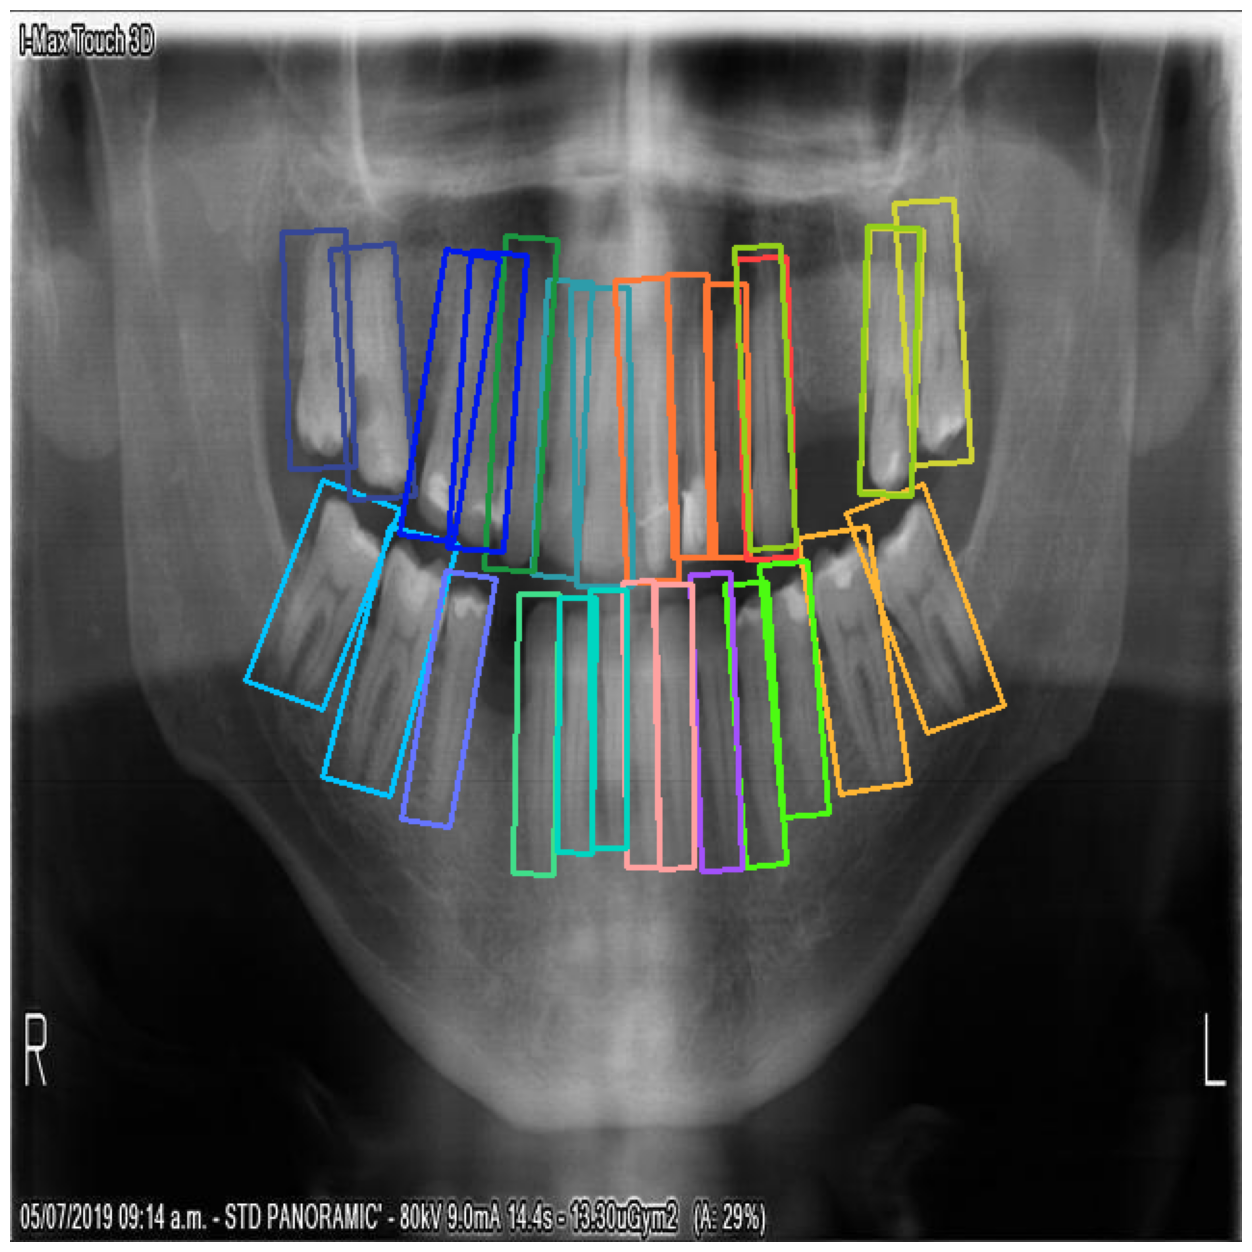

In [ ]:
!pip install supervision==0.18.0 -q

import supervision as sv
import cv2

detections = sv.Detections.from_ultralytics(results[0])

oriented_box_annotator = sv.OrientedBoxAnnotator()
annotated_frame = oriented_box_annotator.annotate(
    scene=cv2.imread(file_name),
    detections=detections
)

sv.plot_image(image=annotated_frame, size=(16, 16))